## Time to get classy

Build a class with some methods and attributes in it.

In [1]:
class Employee:
    def set_name(self, new_name):
        self.name = new_name
        
    def set_salary(self, new_salary):
        self.salary = new_salary
        
    def give_raise(self, amount):
        self.salary += amount
    
    def monthly_salary(self):
        return self.salary / 12
    
#Create an object emp of class Employee
emp = Employee()

emp.set_name('Korel Rossi')
print(emp.name)

emp.set_salary(50000)
print(emp.salary)

Korel Rossi
50000


In [2]:
# Increase salary of emp by 1500
emp.salary = emp.salary + 1500

print(emp.salary)

51500


In [3]:
emp.give_raise(200)
print(emp.salary)

51700


In [4]:
emp.monthly_salary()

4308.333333333333

### Class anatomy: __init__ constructor
- Add data to object when creating it?
- Constructor `__init__()` method is called everytime an object is created

In [5]:
class Customer:
    def __init__(self, name, balance=0):
        self.name = name 
        self.balance = balance
# if you run it without giving it a name, itll throw an error

cust = Customer('Lara de Silva',1000)
print(cust.name)
print(cust.balance)

Lara de Silva
1000


### What is the key differences tho?

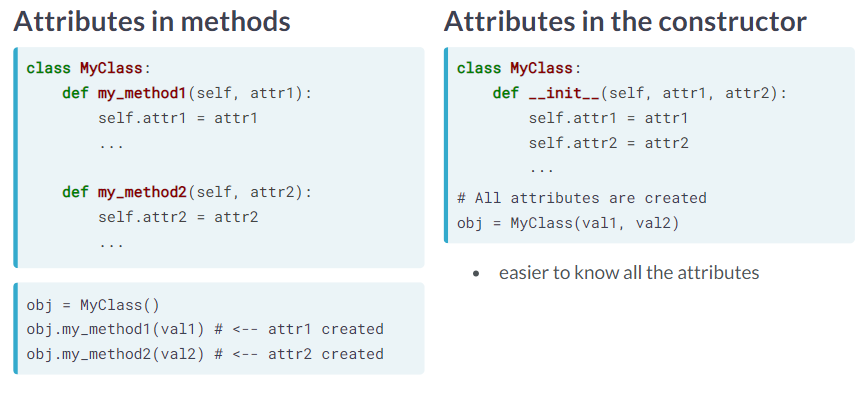

**Best practices**
1. Initialize attributes in `__init__()`
2. Naming convention - `CamelCase` for classes, `lower_snake_case` for functions and attributes

In [13]:
from datetime import datetime 
class Employee:
    def __init__(self, name, salary=0):
        self.name = name
        if salary >= 0:
            self.salary = salary
        else:
            self.salary = 0
            print("Invalid salary!")
        
        self.hire_date = datetime.today()
        
    def give_raise(self, amount):
        self.salary += amount
        
    def monthly_salary(self):
        return self.salary/12
    
emp = Employee("Korel Rossi",100)
print(emp.name)
print(emp.salary)  
print(emp.hire_date)

Korel Rossi
100
2020-06-20 16:59:57.239095


In [14]:
emp = Employee("Campbellsoup", -1000)
print(emp.name)
print(emp.salary)
print(emp.hire_date)

Invalid salary!
Campbellsoup
0
2020-06-20 17:00:06.254108


### Core Principles of OOP
**Inheritance**: Extending functionality of existing code

**Polymorphism**: Creating a unified interface

**Encapsulation**: Bundling of data and methods

In [15]:
#################################
#### Class Level Attributes #####
#################################

class Player:
    MAX_POSITION = 10
    
    def __init__(self):
        self.position = 0
        
print(Player.MAX_POSITION)

p = Player()
print(p.MAX_POSITION)

10
10


In [20]:
## add a move method ##
class Player:
    MAX_POSITION = 10
    MAX_SPEED = 3
    
    def __init__(self):
        self.position = 0
        
    def move(self, steps):
        if self.position + steps < Player.MAX_POSITION:
            self.position += steps
        else:
            self.position = Player.MAX_POSITION
            
    # This method provides a rudimentary visualization in the console    
    def draw(self):
        drawing = "-" * self.position + "|" +"-"*(Player.MAX_POSITION - self.position)
        print(drawing)

p = Player(); p.draw()
p.move(4); p.draw()
p.move(5); p.draw()
p.move(3); p.draw()

|----------
----|------
---------|-
----------|


In [21]:
####### Can we change class attributes? ##########
# Create Players p1 and p2
p1 = Player()
p2 = Player()

print("MAX_SPEED of p1 and p2 before assignment:")
# Print p1.MAX_SPEED and p2.MAX_SPEED
print(p1.MAX_SPEED)
print(p2.MAX_SPEED)

# Assign 7 to p1.MAX_SPEED
p1.MAX_SPEED = 7

print("MAX_SPEED of p1 and p2 after assignment:")
# Print p1.MAX_SPEED and p2.MAX_SPEED
print(p1.MAX_SPEED)
print(p2.MAX_SPEED)

print("MAX_SPEED of Player:")
# Print Player.MAX_SPEED
print(Player.MAX_SPEED)

MAX_SPEED of p1 and p2 before assignment:
3
3
MAX_SPEED of p1 and p2 after assignment:
7
3
MAX_SPEED of Player:
3


In [22]:
###### How about now? ######
# Create Players p1 and p2
p1, p2 = Player(), Player()

print("MAX_SPEED of p1 and p2 before assignment:")
# Print p1.MAX_SPEED and p2.MAX_SPEED
print(p1.MAX_SPEED)
print(p2.MAX_SPEED)

# ---MODIFY THIS LINE--- 
Player.MAX_SPEED = 7

print("MAX_SPEED of p1 and p2 after assignment:")
# Print p1.MAX_SPEED and p2.MAX_SPEED
print(p1.MAX_SPEED)
print(p2.MAX_SPEED)

print("MAX_SPEED of Player:")
# Print Player.MAX_SPEED
print(Player.MAX_SPEED)

MAX_SPEED of p1 and p2 before assignment:
3
3
MAX_SPEED of p1 and p2 after assignment:
7
7
MAX_SPEED of Player:
7


#### Alternative constructors
`@classmethod` & `cls`

For example, you are developing a time series package and want to define your own class for working with dates, BetterDate. The attributes of the class will be year, month, and day. You want to have a constructor that creates BetterDate objects given the values for year, month, and day, but you also want to be able to create BetterDate objects from strings like 2020-04-30

In [24]:
class BetterDate:
    def __init__(self, year, month, day):
        self.year, self.month, self.day = year, month, day
        
    @classmethod
    def from_str(cls, datestr):
        # Split the string at "-" and convert each part to integer
        parts = datestr.split('-')
        year, month, day = int(parts[0]) ,int(parts[1]), int(parts[2])
        
        return cls(year, month, day)

bd = BetterDate.from_str('2020-04-30')
print(bd.year)
print(bd.month)
print(bd.day)

2020
4
30


In [25]:
# see the difference my friend?
instance = BetterDate(2020,4,30)
print(instance.year)
print(instance.month)
print(instance.day)

2020
4
30


### Inheritance

In [33]:
class Employee:
    MIN_SALARY = 30000
    
    def __init__(self, name, salary = Employee.MIN_SALARY):
        self.name = name
        if salary > Employee.MIN_SALARY:
            self.salary = salary
        else:
            self.salary = Employee.MIN_SALARY
            
    def give_raise(self, amount):
        self.salary += amount
        
class Manager(Employee):
    def display(self):
        print('Manager ' + self.name)

mng = Manager(name = 'Debbie Lashko', salary = 86500)
print(mng.name)
mng.display()

Debbie Lashko
Manager Debbie Lashko


#### Customizing functionality via inheritance

In [34]:
class Employee:
    def __init__(self, name, salary = 30000):
        self.name = name
        self.salary = salary
    
    def give_raise(self, amount):
        self.salary += amount
        
class Manager(Employee):
    def __init__(self, name, salary = 50000, project = None):
        
        Employee.__init__(self, name, salary)
        
        self.project = project
    
    def give_raise(self, amount, bonus = 0.05):
        new_amount = amount + amount * bonus
        Employee.give_raise(self, new_amount)
        
    def display(self):
        print('Manager ' + self.name)
        
mngr = Manager("Ashta Dunbar", 78500)
mngr.give_raise(1000)
print(mngr.salary)
mngr.give_raise(2000, bonus=0.03)
print(mngr.salary)

79550.0
81610.0
